In [1]:
import scanpy as sc

sc_data = sc.read_h5ad('/mnt/d/dailywork/multivelo/multivelo_final_cns.h5ad')

In [2]:
sc_data

AnnData object with n_obs × n_vars = 43107 × 16725
    obs: 'orig.ident', 'nCount_peak', 'nFeature_peak', 'blacklist_region_fragments', 'blacklist_ratio', 'high.tss', 'fragments', 'nucleosome_signal', 'TSS.enrichment', 'doublet_score', 'predicted_doublet', 'time', 'FRiP', 'pct_reads_in_peaks', 'peak_region_fragments', 'reads_per_peak', 'peak_snn_res.0.3', 'seurat_clusters', 'tissue', 'cell_type', 'germ_layer', 'subtype', 'subtype_clusters', 'rough_subtype'
    var: 'name'
    obsm: 'X_lsi', 'X_pca', 'X_pca.l2', 'X_umap'

In [3]:
import numpy as np

sub_index = np.random.choice(sc_data.obs.index, size=1000, replace=False)
subsample_data = sc_data[sub_index, :]

In [4]:
subsample_data

View of AnnData object with n_obs × n_vars = 1000 × 16725
    obs: 'orig.ident', 'nCount_peak', 'nFeature_peak', 'blacklist_region_fragments', 'blacklist_ratio', 'high.tss', 'fragments', 'nucleosome_signal', 'TSS.enrichment', 'doublet_score', 'predicted_doublet', 'time', 'FRiP', 'pct_reads_in_peaks', 'peak_region_fragments', 'reads_per_peak', 'peak_snn_res.0.3', 'seurat_clusters', 'tissue', 'cell_type', 'germ_layer', 'subtype', 'subtype_clusters', 'rough_subtype'
    var: 'name'
    obsm: 'X_lsi', 'X_pca', 'X_pca.l2', 'X_umap'

/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


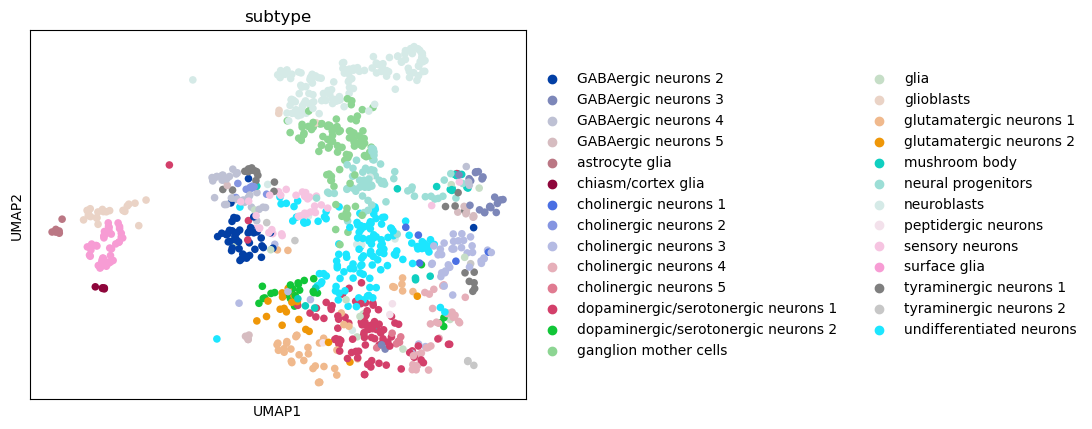

In [5]:
sc.pl.umap(subsample_data, color = 'subtype')

In [7]:
import scvelo as scv

scv.pp.log1p(subsample_data)

In [8]:
subsample_data

AnnData object with n_obs × n_vars = 1000 × 16725
    obs: 'orig.ident', 'nCount_peak', 'nFeature_peak', 'blacklist_region_fragments', 'blacklist_ratio', 'high.tss', 'fragments', 'nucleosome_signal', 'TSS.enrichment', 'doublet_score', 'predicted_doublet', 'time', 'FRiP', 'pct_reads_in_peaks', 'peak_region_fragments', 'reads_per_peak', 'peak_snn_res.0.3', 'seurat_clusters', 'tissue', 'cell_type', 'germ_layer', 'subtype', 'subtype_clusters', 'rough_subtype'
    var: 'name'
    uns: 'subtype_colors'
    obsm: 'X_lsi', 'X_pca', 'X_pca.l2', 'X_umap'

In [9]:
scv.pp.moments(subsample_data, n_pcs=30, n_neighbors=50)

computing neighbors
    finished (0:00:07) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


In [16]:
subsample_data

AnnData object with n_obs × n_vars = 1000 × 16725
    obs: 'orig.ident', 'nCount_peak', 'nFeature_peak', 'blacklist_region_fragments', 'blacklist_ratio', 'high.tss', 'fragments', 'nucleosome_signal', 'TSS.enrichment', 'doublet_score', 'predicted_doublet', 'time', 'FRiP', 'pct_reads_in_peaks', 'peak_region_fragments', 'reads_per_peak', 'peak_snn_res.0.3', 'seurat_clusters', 'tissue', 'cell_type', 'germ_layer', 'subtype', 'subtype_clusters', 'rough_subtype', 'n_counts'
    var: 'name'
    uns: 'subtype_colors', 'neighbors'
    obsm: 'X_lsi', 'X_pca', 'X_pca.l2', 'X_umap'
    obsp: 'distances', 'connectivities'

In [12]:
subsample_data.obs.head()

,orig.ident,nCount_peak,nFeature_peak,blacklist_region_fragments,blacklist_ratio,high.tss,fragments,nucleosome_signal,TSS.enrichment,doublet_score,...,peak_region_fragments,reads_per_peak,peak_snn_res.0.3,seurat_clusters,tissue,cell_type,germ_layer,subtype,subtype_clusters,rough_subtype
index,,,,,,,,,,,,,,,,,,,,,
ATAC2206210010_ATAC2206210010_BC02933_N03,ATAC2206210010,12576.0,5530,381,0.034458,High,19085,0.386541,1.885275,0.226337,...,12576.0,2.274141,26,26,CNS,neuron,neuroectoderm,glutamatergic neurons 1,15,mature neurons
ATAC2208290016_ATAC2208290016_BC04429_N02,ATAC2208290016,10161.0,5231,316,0.034129,High,15537,0.479249,1.799273,0.071549,...,10161.0,1.942458,9,9,CNS,neuron,neuroectoderm,undifferentiated neurons,25,undifferentiated neurons
ATAC2208290013_ATAC2208290013_BC07286_N04,ATAC2208290013,9229.0,4452,359,0.042275,High,14119,0.538194,2.220824,0.320809,...,9229.0,2.073001,5,5,CNS,CNS primordium,neuroectoderm,neural progenitors,5,neural progenitors
ATAC2206210031_ATAC2206210031_BC06547_N02,ATAC2206210031,17093.0,7443,407,0.027297,High,26056,0.371100,1.773857,0.060713,...,17093.0,2.296520,9,9,CNS,neuron,neuroectoderm,dopaminergic/serotonergic neurons 1,32,mature neurons
ATAC2206210031_ATAC2206210031_BC07017_N02,ATAC2206210031,15357.0,6507,447,0.033503,High,23807,0.348075,1.907064,0.248858,...,15357.0,2.360074,10,10,CNS,neuron,neuroectoderm,cholinergic neurons 5,20,mature neurons


In [17]:
color_dict = {}

for celltype, color in zip(list(set(subsample_data.obs.subtype)), subsample_data.uns['subtype_colors']):
    color_dict[celltype] = color


In [19]:
subsample_data.obs['subtype_colors'] = [color_dict[i] for i in subsample_data.obs.subtype.tolist()]

In [22]:
import multivelo as mv


sc_result = mv.recover_dynamics_chrom(subsample_data,
                                    #
                                      max_iter=5,
                                      init_mode='invert',
                                      verbose=False,
                                      parallel=True,
                                      save_plot=False,
                                      rna_only=False,
                                      fit=True,
                                      n_anchors=500,
                                      extra_color_key='subtype')

KeyError: 'Mu'

In [14]:
mv.velocity_graph(sc_data)

ValueError: Velocity matrix is not found. Please run multivelo.recover_dynamics_chrom function first.

In [11]:
sc_result = mv.recover_dynamics_chrom(sc_data[sc_data.obs.index.str.contains('ATAC')],
                                      sc_data[sc_data.obs.index.str.contains('CELL')][:43107],
                                      max_iter=5,
                                      init_mode='invert',
                                      verbose=False,
                                      parallel=True,
                                      save_plot=False,
                                      rna_only=False,
                                      fit=True,
                                      n_anchors=500,
                                      extra_color_key='subtype_new')

ValueError: obs_names of RNA and ATAC adata objects do not match, please check if they are consistent